<a href="https://colab.research.google.com/github/lokeshparab/Supermarket_Sales/blob/main/Super_Market_Sales_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Analyze supermarket sales across different branches and provide insight to understand the customer better. They need to predict the gross income according to the cost of goods sold and the rating given by the customer.

# Installing Libraries

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Dataset/'

Mounted at /content/drive


# Loading Dataset

In [ ]:
df =  pd.read_csv(path+'supermarket/supermarket_sales.csv')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [ ]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [ ]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [ ]:
df['gross margin percentage'].unique()

array([4.76190476])

In [ ]:
df['Date'].unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [ ]:
arr = list(df['Rating'].unique())
arr.sort()

# Statistical Information

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df[['Branch','City','Customer type','Gender','Product line','Payment']].mode()

,Branch,City,Customer type,Gender,Product line,Payment
0,A,Yangon,Member,Female,Fashion accessories,Ewallet


In [ ]:
df.median()

Unit price                  55.230000
Quantity                     5.000000
Tax 5%                      12.088000
Total                      253.848000
cogs                       241.760000
gross margin percentage      4.761905
gross income                12.088000
Rating                       7.000000
dtype: float64

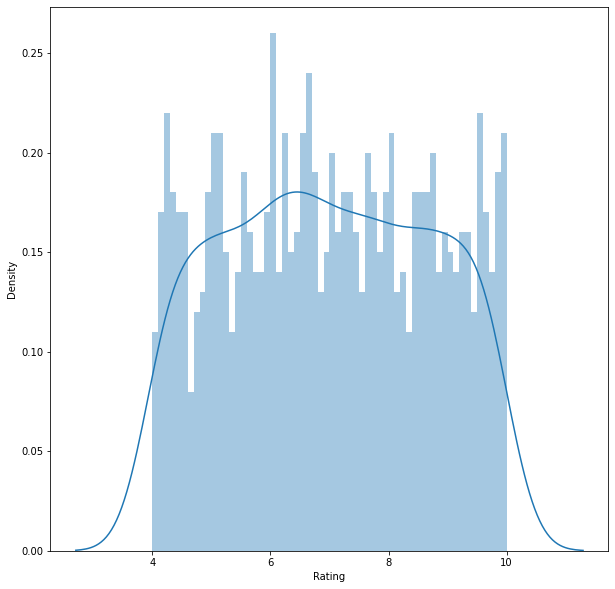

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['Rating'],bins=arr)

plt.show()

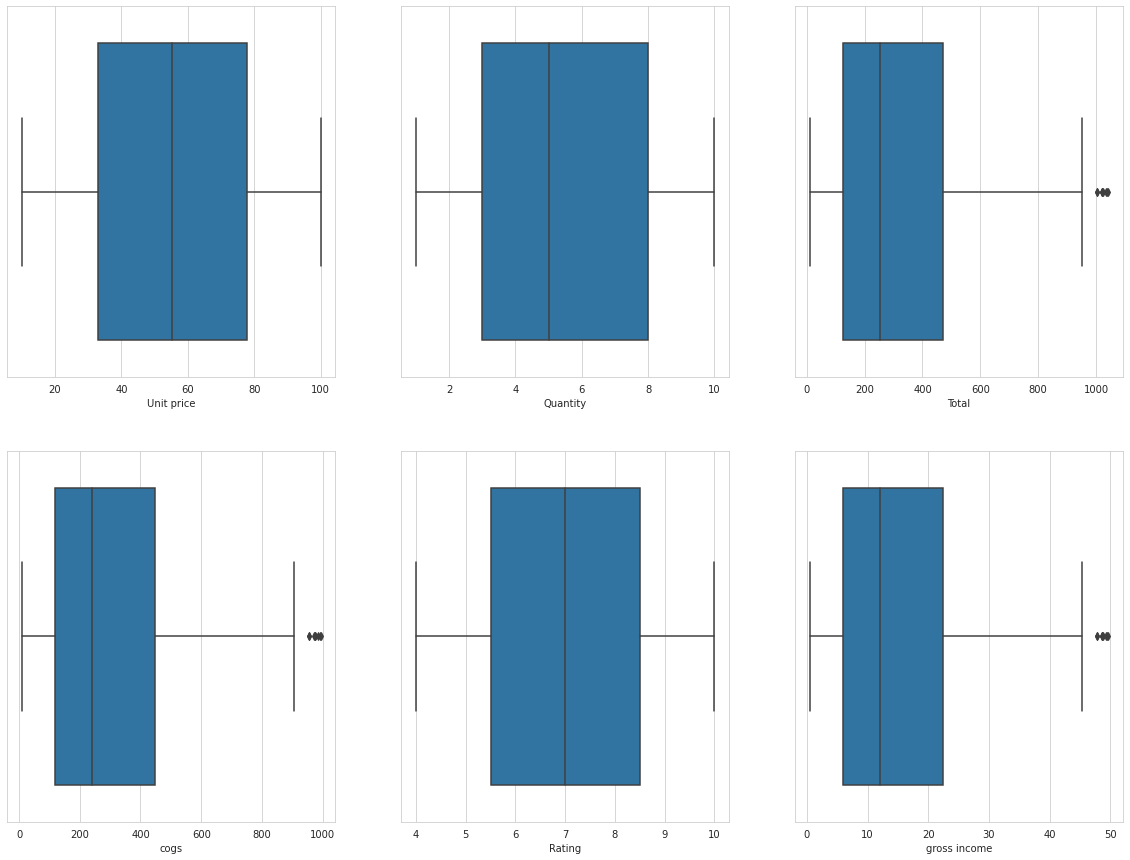

In [ ]:
plt.figure(figsize=(20,15))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

# Preprocessing

## Checking null values

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Dateline Formating

In [ ]:
df['DateTime'] = df['Date'].values + ' ' + df['Time'].values

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'] ,errors='coerce')

In [ ]:
def weekday(no):
  days = ['Monday','Tueday','Wednesday','Thurday','Friday','Saturday','Sunday']
  return days[no]

df['Weekday'] = df.DateTime.dt.dayofweek.apply(weekday).values

## Remove Columns

In [ ]:
margin = df['gross margin percentage'].unique()[0]
df.drop(['gross margin percentage','Date','Time'],axis=1,inplace=True)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,DateTime,Weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00,Friday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax 5%         1000 non-null   float64       
 9   Total          1000 non-null   float64       
 10  Payment        1000 non-null   object        
 11  cogs           1000 non-null   float64       
 12  gross income   1000 non-null   float64       
 13  Rating         1000 non-null   float64       
 14  DateTime       1000 non-null   datetime64[ns]
 15  Weekday        1000 no

# EDA

In [ ]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


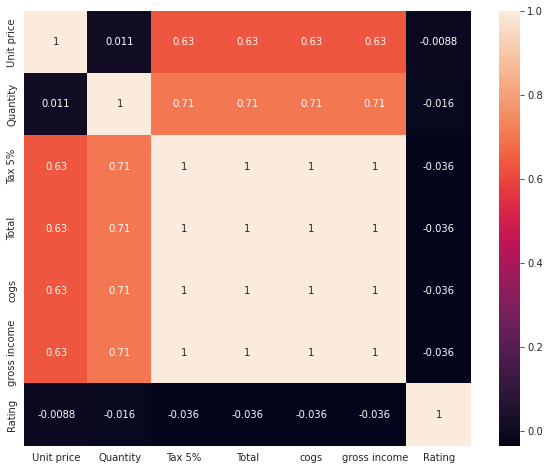

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap( corr , xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

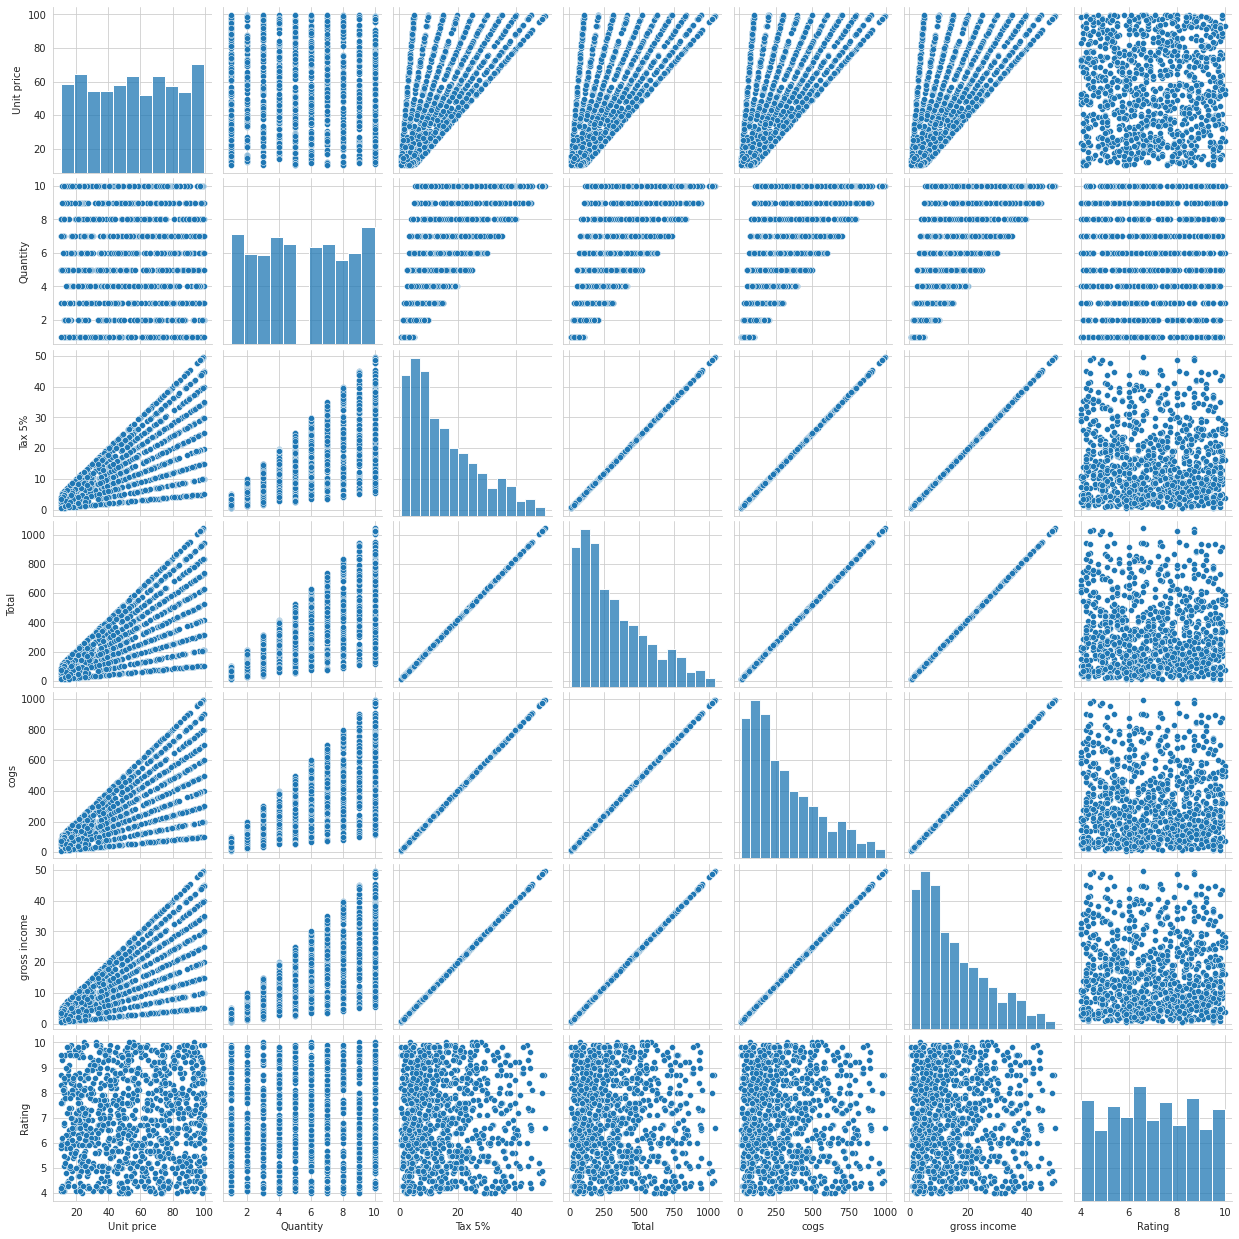

In [ ]:
sns.pairplot(df)

## Relation of Gross Income and Rating

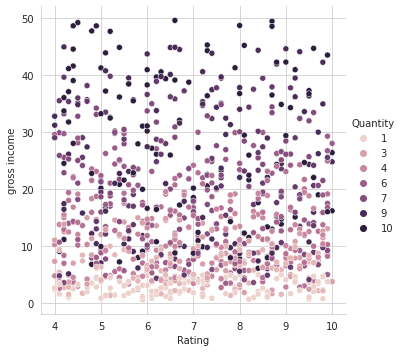

In [ ]:
sns.relplot(x='Rating', y='gross income', hue='Quantity', data= df)
plt.show()

In [ ]:
df.max()

Invoice ID               898-04-2717
Branch                             C
City                          Yangon
Customer type                 Normal
Gender                          Male
Product line       Sports and travel
Unit price                     99.96
Quantity                          10
Tax 5%                         49.65
Total                        1042.65
Payment                      Ewallet
cogs                           993.0
gross income                   49.65
Rating                          10.0
DateTime         2019-03-30 20:37:00
Weekday                    Wednesday
dtype: object

### Relation between Unit price and Quantity with  gross income, Tax 5%, Total

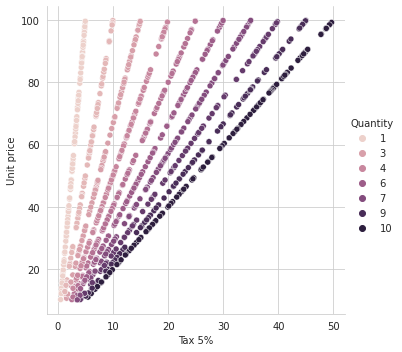

In [ ]:
sns.relplot(x='Tax 5%', y='Unit price', hue='Quantity', data= df)

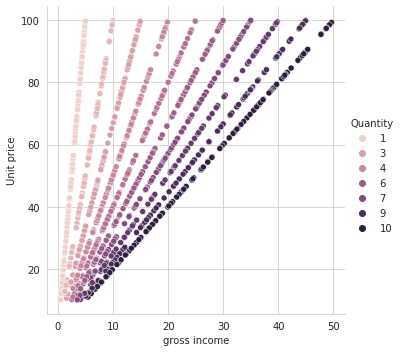

In [ ]:
sns.relplot(x='gross income', y='Unit price', hue='Quantity', data= df)

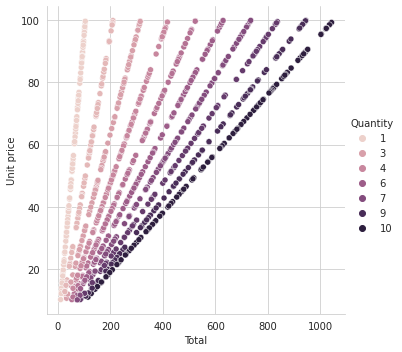

In [ ]:
sns.relplot(x='Total', y='Unit price', hue='Quantity', data= df)

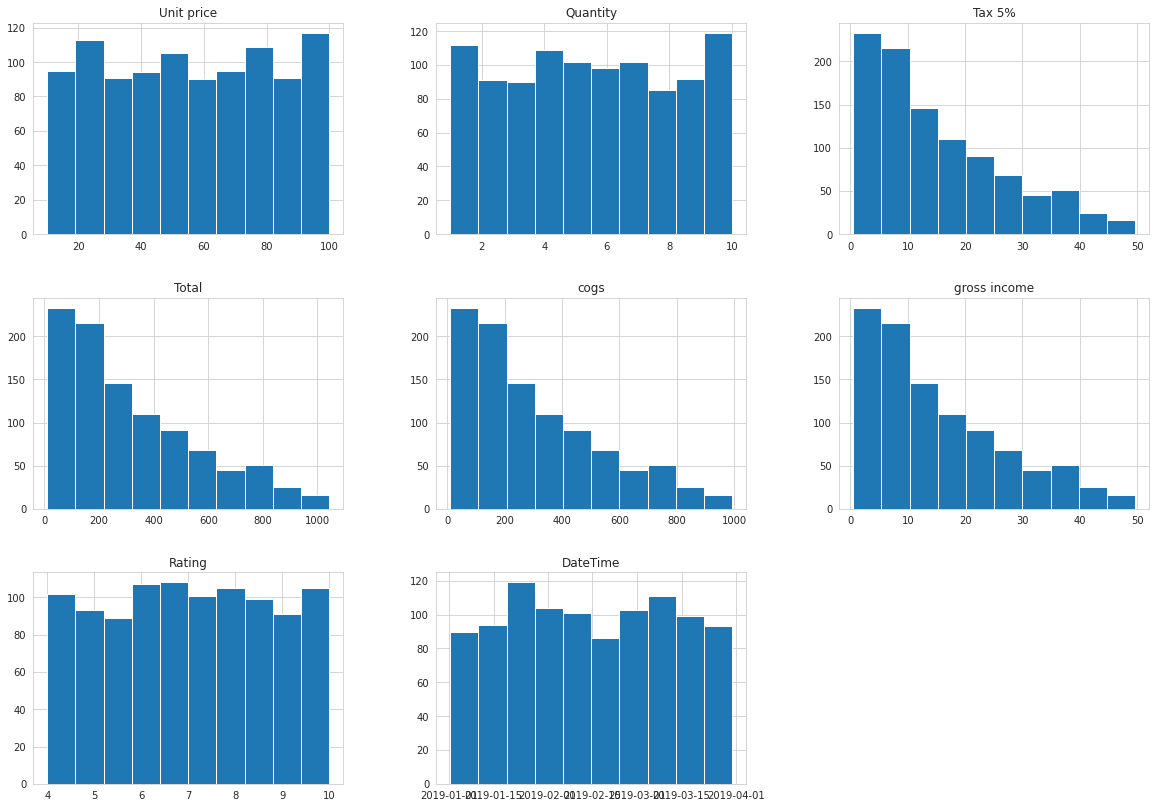

In [ ]:
df.hist(figsize=(20,14))
plt.show()

## Distribution of Total

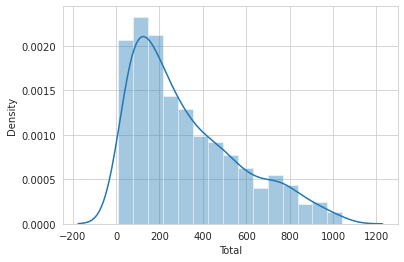

In [ ]:
sns.distplot(df['Total'])

# Data Visualisation

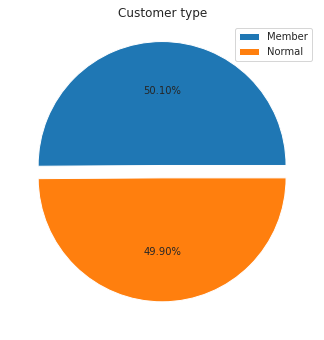

In [ ]:
data =  df.groupby('Customer type').count()['Invoice ID']
plt.figure(figsize = (5.7,5.7))
plt.pie(data.values , explode=[0.1,0.0], autopct = '%.2f%%')
plt.legend(data.index)
plt.title('Customer type')
plt.show()

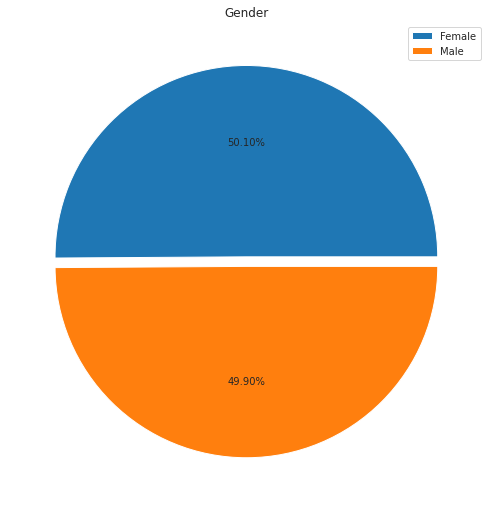

In [ ]:
data =  df.groupby('Gender').count()['Invoice ID']
plt.figure(figsize = (8.8,8.8))
plt.pie(data.values ,explode=[0.025,0.025], autopct = '%.2f%%')
plt.legend(data.index)
plt.title('Gender')
plt.show()

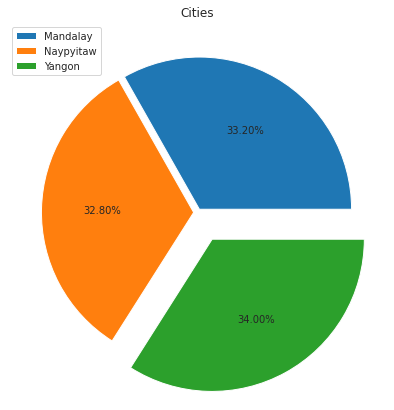

In [ ]:
data =  df.groupby('City').count()['Invoice ID']
plt.figure(figsize = (7,7))
plt.pie(data.values ,explode=[0.025,0.025,0.2], autopct = '%.2f%%')
plt.legend(data.index)
plt.title('Cities')
plt.show()

# Inference

## Popular payment method used by customers:- 
  There are 3 payment method that are **Cash, Credit card and Ewallet**. They are found to be almost equally distributed and <u>Ewallet</u> is most popular payment used by customers

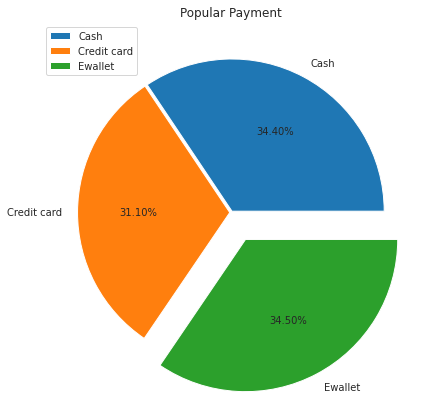

In [ ]:
data = df.groupby('Payment').count()['Invoice ID']
data.plot(kind='pie', figsize = (7,7), explode=[0.01,0.01,0.2], autopct='%.2f%%')
plt.legend(data.index)
plt.ylabel('')
plt.title('Popular Payment')
plt.show()

## Does gross income affect the ratings that the customers provide?

**NO**, As per relational plot graph data point are scatter

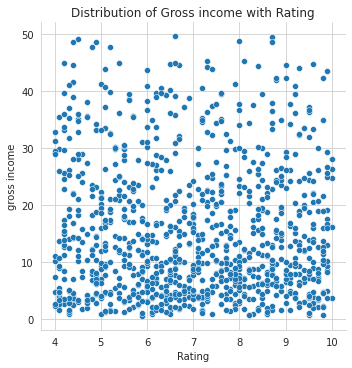

In [ ]:
sns.relplot(x='Rating', y='gross income', data= df)
plt.title('Distribution of Gross income with Rating')
plt.show()

## Which branch is the most profitable?
**Branch C** is the most profitable

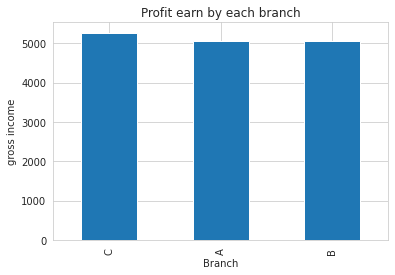

In [ ]:
data = df.groupby('Branch').sum()['gross income'].sort_values(ascending=False)
data.plot.bar(figsize=(6,4))
plt.ylabel('gross income')
plt.title('Profit earn by each branch')
plt.show()

## Is there any relationship between Gender and Gross income ?
Gross income is similar to both Male and Female. Only at  75th percent female buy more product than male

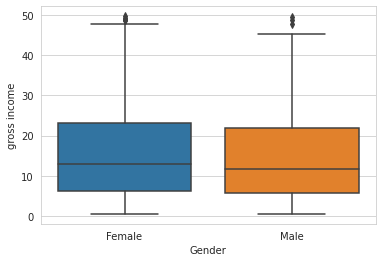

In [ ]:
sns.boxplot(x=df['Gender'],y=df['gross income'])
plt.show()

## Is there any time trend in gross income?
**NO**, There is no specific time trend in gross income

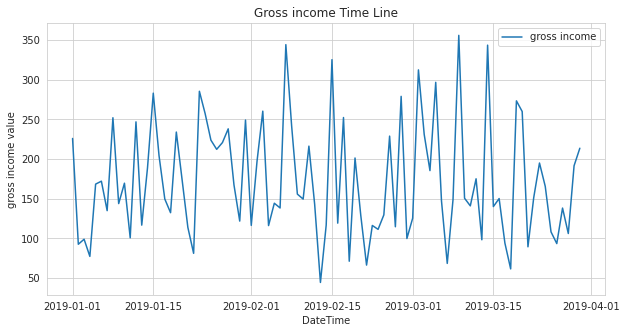

In [ ]:
df_temp = df.sort_values(by=['DateTime'],ascending=True)[['DateTime','gross income']]
df_temp.groupby(by=df_temp.DateTime.dt.date).sum().plot(figsize=(10,5))
plt.ylabel('gross income value')
plt.title('Gross income Time Line')
plt.show()

## What is the spending pattern of females and males and in which category do they spend a lot?
* <u>Females</u> spend lot in **Fashion and Accessories** products.
* <u>Males</u> spend lot in **Health and Beauty products**


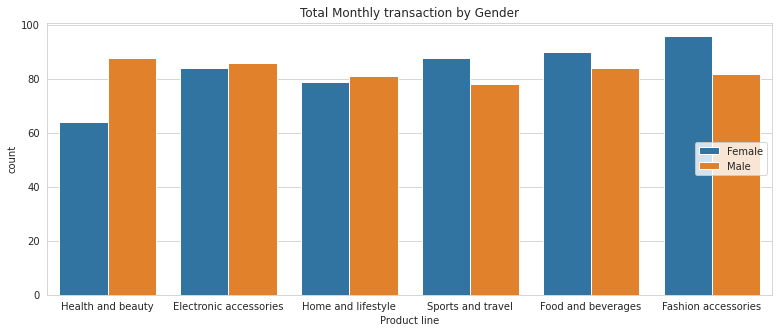

In [ ]:
plt.figure(figsize=(13, 5))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Product line'], hue = df.Gender)
plt.legend(loc='center right')
plt.show()

## How many products are bought by customers?
There are **6 products** bought by customers

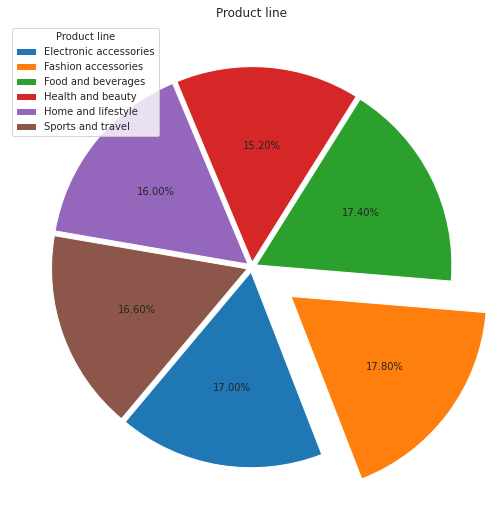

In [ ]:
data =  df.groupby('Product line').count()['Invoice ID']
plt.figure(figsize = (9,9))
plt.pie(data.values ,explode=[0.025,0.25,0.025,.025,.025,.025], startangle=-130 ,autopct = '%.2f%%')
plt.legend(data.index,title='Product line')
plt.title('Product line')
plt.show()

In [ ]:
len(df['Product line'].unique())

6

## Which day of the week has maximum sales?
**Saturday** of the week has maximum sales

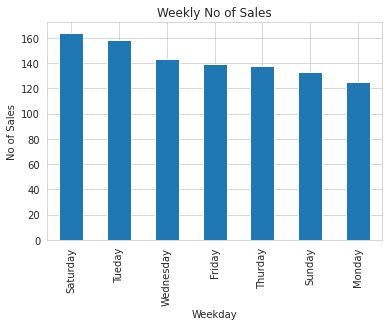

In [ ]:
df.groupby("Weekday").count()['Invoice ID'].sort_values(ascending=False).plot.bar()
plt.ylabel('No of Sales')
plt.title('Weekly No of Sales')
plt.show()

## Which city should be chosen for expansion and which products should it focus on?
People buying product  are have similar distribution as per city. If you look at specific product sold as per city which product to focus are as follows:

| Cities | Product |
| --- | --- |
| Yangon | Home and lifestyle |
| Naypyitaw City | Food and beverages |
| Mandalay | Fashion accessories & Sports and travel |


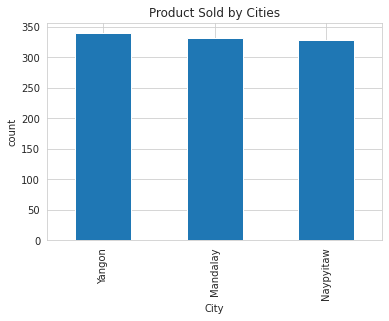

In [ ]:
df.groupby('City').count()['Invoice ID'].sort_values(ascending=False).plot.bar()
plt.ylabel('count')
plt.title('Product Sold by Cities')
plt.show()

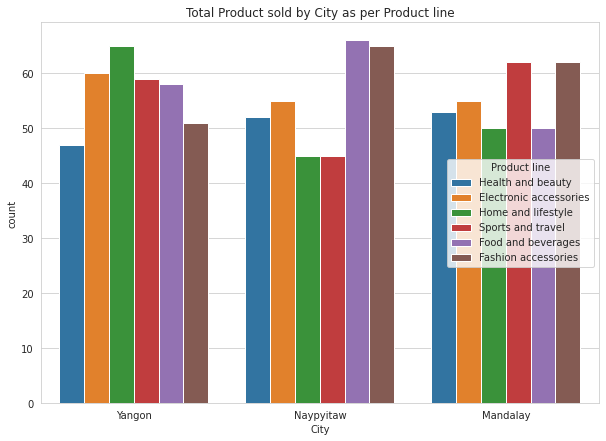

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Total Product sold by City as per Product line')
sns.countplot( df['City'] ,hue=df['Product line'])
plt.legend(loc='center right',title='Product line')
plt.show()

## Which hour of the day is the busiest?
**19:00 / 7 pm** of the day is the busiest

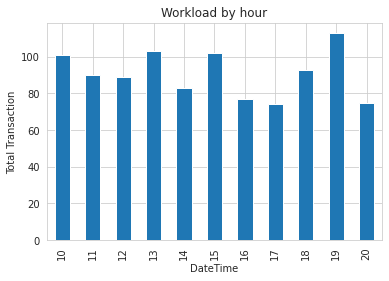

In [ ]:
df.groupby(df.DateTime.dt.hour).count()['Invoice ID'].plot(kind='bar')
plt.ylabel('Total Transaction')
plt.title('Workload by hour')
plt.show()

# Build  model

## Model 1

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,DateTime,Weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00,Friday


In [ ]:
df1 = df.drop(['Invoice ID','Branch','City','Customer type','Gender','Product line','DateTime','Payment','Weekday'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression  

In [ ]:
#preparinf the data
X = df1[['cogs']].values 
y = df1['gross income'].values 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [ ]:

regressor = LinearRegression()  
regressor.fit(np.array(X_train).reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


In [ ]:
import matplotlib.pyplot as plt  
%matplotlib inline

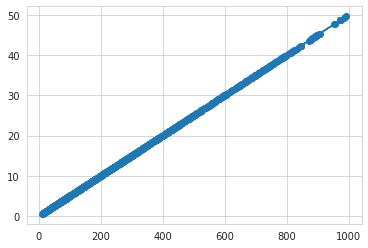

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X.reshape(-1,1), y)
plt.plot(X.reshape(-1,1), line);
plt.show()

In [ ]:
y_pred = regressor.predict(np.array(X_test).reshape(-1,1))

In [ ]:
regressor.score(X_test.reshape(-1,1), y_test)

1.0

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00


## Model 2

In [ ]:
df1.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3


In [ ]:
#preparinf the data
X = df1.drop(['gross income'],axis=1).values 
y = df1['gross income'].values 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [ ]:
y_train.shape

(800,)

In [ ]:
regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [ ]:
y_pred = regressor2.predict(X_test)

In [ ]:
regressor2.score(X_test, y_test)

1.0

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00


## Model 3 ( Predict Gross income from cogs and Ratings)

In [ ]:
df1.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3


In [ ]:
#preparinf the data
X = df1[['cogs','Rating']].values 
y = df1['gross income'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test, y_test)

1.0

In [ ]:
regressor.intercept_

1.7763568394002505e-15

In [ ]:
regressor.coef_

array([ 5.00000000e-02, -1.93337513e-16])

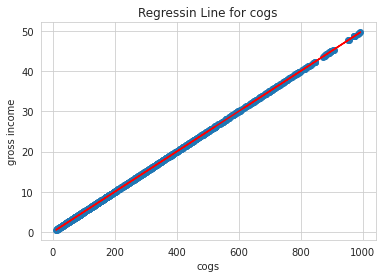

In [ ]:
# Plotting the regression line
line = regressor.coef_[0]*X[:,0]+regressor.intercept_

# Plotting for the test data
plt.scatter(X[:,0], y)
plt.plot(X[:,0], line, color='red');
plt.xlabel('cogs')
plt.ylabel('gross income')
plt.title('Regressin Line for cogs')
plt.show()

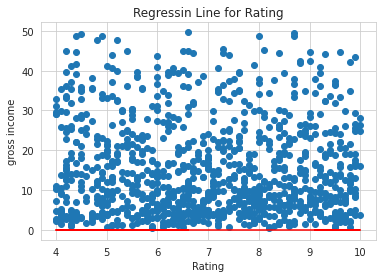

In [ ]:
# Plotting the regression line
line = regressor.coef_[1]*X[:,1]+regressor.intercept_

# Plotting for the test data
plt.scatter(X[:,1], y)
plt.plot(X[:,1], line,color='red');
plt.xlabel('Rating')
plt.ylabel('gross income')
plt.title('Regressin Line for Rating')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00


In [ ]:
pickle.dump( regressor ,open('Multilinear_Model.sav','wb'))

# Model Prediction of gross income

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle 

def predict_gross_income(X):
  
    path = '/content/drive/MyDrive/Dataset/'
    file = open(path + 'supermarket/Multilinear_Model.sav','rb')
    model = pickle.load(file)
    y_pred = model.predict(X)
    print('Predicted gross income = Rs', *y_pred)

def rating():
    while True:
        r = float(input('Enter the Ratings: '))
        if 4<=r<=10: break
        else: print('Ratings valid b/w 4 to 10')
    return r
        
    
cogs = float(input('Enter the cogs: '))
rating = rating()

predict_gross_income([[cogs,rating]])

Enter the cogs: 345.621
Enter the Ratings: 6.7
Predicted gross income = Rs 17.281049999999997
